<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Resultados_Hands-On_Estudiantes/Dia%201/Jes%C3%BAs_Santos_Modelo_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

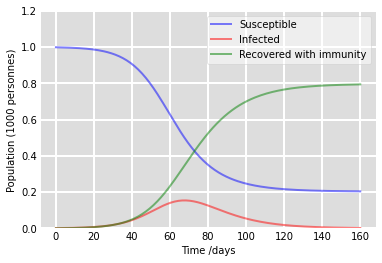

In [ ]:
import numpy as np
import scipy.integrate as si
from scipy.integrate import odeint
import matplotlib as ml
from matplotlib import pyplot as plt

N=1000        #Población total  
I0=1          #Número inicial de personas infectadas
R0=0          #Número de personas recuperadas
S0=N-I0-R0    #Número inicial de personas susceptibles

gamma=1./10   #Tasa de recuperación
beta=0.2      #Tasa de contacto

Total_dias = 160  #Tiempo final
T_0= 0            #Tiempo inicial
num=160            #Número de puntos en el array 1D

#Se introduce la variable de tiempo 

t = np.linspace(T_0, Total_dias, num)

#Se introduce una funcion "f" que depende del tiempo "t" y un vector "$\vec{y}$"

def f(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#Condiciones iniciales
y_0=S0, I0, R0

#Integrando las ecuaciones de SIR a lo largo del tiempo t.
ret = odeint(f, y_0, t, args=(N, beta, gamma))
S, I, R = ret.T

#Se realiza el gráfico
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population (1000 personnes)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()



